In [ ]:
!pip install pyg-lib torch-scatter torch-sparse -f https://data.pyg.org/whl/torch-1.13.0+cu116.html
!pip install torch-geometric
!pip install umap-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://data.pyg.org/whl/torch-1.13.0+cu116.html
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from my_net import *
from my_util import *
from my_trainer import *

import pandas as pd
from torch import optim

In [ ]:
fpath_regression = '/content/drive/MyDrive/Lab/GNN_B4/data/data_for_regression.csv'
fpath_binary = '/content/drive/MyDrive/Lab/GNN_B4/data/data_for_binary_classification.csv'
fpath_4 = '/content/drive/MyDrive/Lab/GNN_B4/data/data_for_4_classification.csv'
fpath_6 = '/content/drive/MyDrive/Lab/GNN_B4/data/data_for_6_classification.csv'
fpath_8 = '/content/drive/MyDrive/Lab/GNN_B4/data/data_for_8_classification.csv'
fpath_10 = '/content/drive/MyDrive/Lab/GNN_B4/data/data_for_10_classification.csv'

In [ ]:
ne = 60
nr = 3

Start training
epoch:  1
train_loss: 0.136740, train_accuracy: 29.5574%, valid_loss: 0.129925, valid_accuracy: 32.6316%
epoch:  2
train_loss: 0.132495, train_accuracy: 30.6077%, valid_loss: 0.129749, valid_accuracy: 32.6316%
epoch:  3
train_loss: 0.132200, train_accuracy: 30.4576%, valid_loss: 0.128905, valid_accuracy: 32.6316%
epoch:  4
train_loss: 0.131497, train_accuracy: 30.7577%, valid_loss: 0.129036, valid_accuracy: 32.6316%
epoch:  5
train_loss: 0.132416, train_accuracy: 31.2828%, valid_loss: 0.129752, valid_accuracy: 32.6316%
epoch:  6
train_loss: 0.131608, train_accuracy: 30.9827%, valid_loss: 0.129384, valid_accuracy: 32.6316%
epoch:  7
train_loss: 0.131960, train_accuracy: 30.9827%, valid_loss: 0.128676, valid_accuracy: 32.6316%
epoch:  8
train_loss: 0.131022, train_accuracy: 31.9580%, valid_loss: 0.129378, valid_accuracy: 32.6316%
epoch:  9
train_loss: 0.131398, train_accuracy: 31.4329%, valid_loss: 0.129175, valid_accuracy: 32.6316%
epoch: 10
train_loss: 0.131520, train_ac

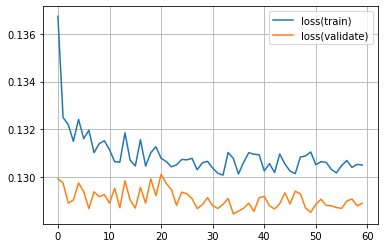

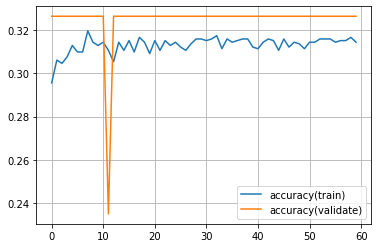

Start training
epoch:  1
train_loss: 0.134756, train_accuracy: 29.7824%, valid_loss: 0.131790, valid_accuracy: 32.2807%
epoch:  2
train_loss: 0.132312, train_accuracy: 28.6572%, valid_loss: 0.131218, valid_accuracy: 32.2807%
epoch:  3
train_loss: 0.132123, train_accuracy: 28.7322%, valid_loss: 0.130671, valid_accuracy: 32.2807%
epoch:  4
train_loss: 0.131452, train_accuracy: 29.8575%, valid_loss: 0.130580, valid_accuracy: 32.2807%
epoch:  5
train_loss: 0.132020, train_accuracy: 30.3076%, valid_loss: 0.130621, valid_accuracy: 32.2807%
epoch:  6
train_loss: 0.131689, train_accuracy: 30.6077%, valid_loss: 0.130790, valid_accuracy: 32.2807%
epoch:  7
train_loss: 0.131148, train_accuracy: 29.4824%, valid_loss: 0.130441, valid_accuracy: 32.2807%
epoch:  8
train_loss: 0.131586, train_accuracy: 30.1575%, valid_loss: 0.130179, valid_accuracy: 32.2807%
epoch:  9
train_loss: 0.131148, train_accuracy: 29.4824%, valid_loss: 0.131071, valid_accuracy: 32.2807%
epoch: 10
train_loss: 0.130889, train_ac

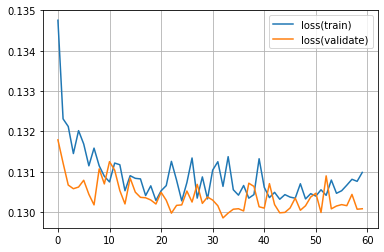

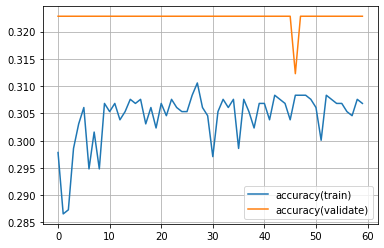

Start training
epoch:  1
train_loss: 0.137082, train_accuracy: 30.4576%, valid_loss: 0.132566, valid_accuracy: 30.5263%
epoch:  2
train_loss: 0.131932, train_accuracy: 30.6827%, valid_loss: 0.131455, valid_accuracy: 30.5263%
epoch:  3
train_loss: 0.134738, train_accuracy: 30.5326%, valid_loss: 0.131282, valid_accuracy: 30.5263%
epoch:  4
train_loss: 0.132527, train_accuracy: 30.6077%, valid_loss: 0.131693, valid_accuracy: 30.5263%
epoch:  5
train_loss: 0.132171, train_accuracy: 30.7577%, valid_loss: 0.131376, valid_accuracy: 30.5263%
epoch:  6
train_loss: 0.132667, train_accuracy: 30.1575%, valid_loss: 0.131050, valid_accuracy: 30.5263%
epoch:  7
train_loss: 0.132098, train_accuracy: 29.4824%, valid_loss: 0.130919, valid_accuracy: 30.5263%
epoch:  8
train_loss: 0.131798, train_accuracy: 30.4576%, valid_loss: 0.130454, valid_accuracy: 30.5263%
epoch:  9
train_loss: 0.131716, train_accuracy: 30.6827%, valid_loss: 0.130213, valid_accuracy: 30.5263%
epoch: 10
train_loss: 0.131563, train_ac

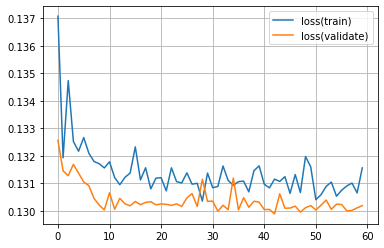

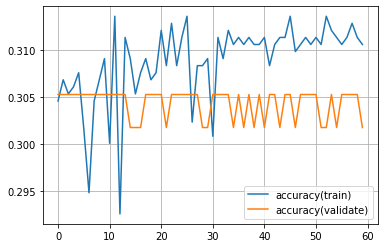

In [ ]:
for i in range(nr):
  net_class_l2 = Net_for_classification2(n_1=512, n_2=64, num_classes=6)
  net_class_l2.to(set_device())
  trainer = My_trainer(fpath=fpath_6, net=net_class_l2, loss_func_name='cross_entropy_loss', batchsize=12, num_epoch=ne, path_history='/content/drive/MyDrive/Lab/GNN_B4/history', task='classification')
  history = trainer.do_train_and_validate()
  t_losses = history['train_loss_values']
  t_accus = history['train_accuracy_values']
  v_losses = history['valid_loss_values']
  v_accus = history['valid_accuracy_values']
  trainer.plot_graph(t_losses, v_losses, ne, 'loss(train)', 'loss(validate)', True, 'loss_graph')
  trainer.save_loss_log(t_losses, v_losses, i)
  trainer.plot_graph(t_accus, v_accus, ne, 'accuracy(train)', 'accuracy(validate)', save=True, graph_name='acc_graph')
  trainer.save_acc_log(t_accus, v_accus, i)

Start training
epoch:  1
train_loss: 0.135282, train_accuracy: 28.2821%, valid_loss: 0.130150, valid_accuracy: 32.6316%
epoch:  2
train_loss: 0.132088, train_accuracy: 31.1328%, valid_loss: 0.130112, valid_accuracy: 32.6316%
epoch:  3
train_loss: 0.132262, train_accuracy: 30.7577%, valid_loss: 0.130492, valid_accuracy: 32.6316%
epoch:  4
train_loss: 0.131388, train_accuracy: 30.4576%, valid_loss: 0.129387, valid_accuracy: 32.6316%
epoch:  5
train_loss: 0.131943, train_accuracy: 30.9077%, valid_loss: 0.129512, valid_accuracy: 32.6316%
epoch:  6
train_loss: 0.131943, train_accuracy: 31.4329%, valid_loss: 0.129251, valid_accuracy: 32.6316%
epoch:  7
train_loss: 0.131362, train_accuracy: 31.6579%, valid_loss: 0.129461, valid_accuracy: 32.6316%
epoch:  8
train_loss: 0.131251, train_accuracy: 31.0578%, valid_loss: 0.129455, valid_accuracy: 32.6316%
epoch:  9
train_loss: 0.131121, train_accuracy: 30.9077%, valid_loss: 0.129772, valid_accuracy: 32.6316%
epoch: 10
train_loss: 0.130763, train_ac

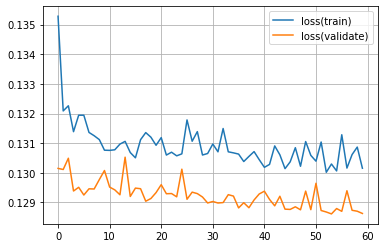

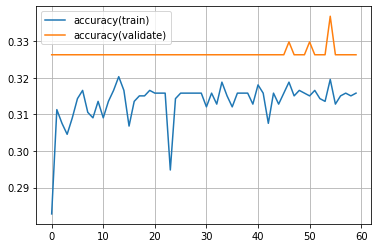

Start training
epoch:  1
train_loss: 0.135518, train_accuracy: 29.7074%, valid_loss: 0.130427, valid_accuracy: 32.9825%
epoch:  2
train_loss: 0.132807, train_accuracy: 30.6077%, valid_loss: 0.130910, valid_accuracy: 32.9825%
epoch:  3
train_loss: 0.131525, train_accuracy: 30.3076%, valid_loss: 0.131059, valid_accuracy: 26.3158%
epoch:  4
train_loss: 0.130767, train_accuracy: 30.9077%, valid_loss: 0.130184, valid_accuracy: 32.9825%
epoch:  5
train_loss: 0.130582, train_accuracy: 30.8327%, valid_loss: 0.129914, valid_accuracy: 32.9825%
epoch:  6
train_loss: 0.130962, train_accuracy: 31.4329%, valid_loss: 0.129550, valid_accuracy: 32.9825%
epoch:  7
train_loss: 0.130738, train_accuracy: 30.0825%, valid_loss: 0.129572, valid_accuracy: 32.9825%
epoch:  8
train_loss: 0.131035, train_accuracy: 30.6077%, valid_loss: 0.129360, valid_accuracy: 32.9825%
epoch:  9
train_loss: 0.130408, train_accuracy: 29.8575%, valid_loss: 0.129823, valid_accuracy: 32.9825%
epoch: 10
train_loss: 0.130117, train_ac

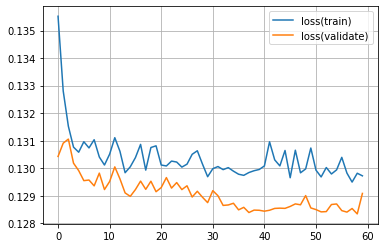

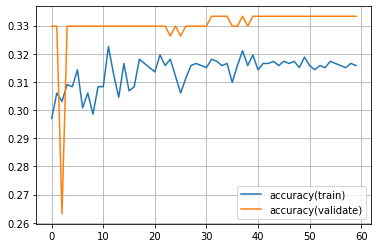

Start training
epoch:  1
train_loss: 0.136190, train_accuracy: 29.8575%, valid_loss: 0.132938, valid_accuracy: 33.6842%
epoch:  2
train_loss: 0.132488, train_accuracy: 26.8567%, valid_loss: 0.133037, valid_accuracy: 33.6842%
epoch:  3
train_loss: 0.131913, train_accuracy: 29.7824%, valid_loss: 0.133272, valid_accuracy: 33.6842%
epoch:  4
train_loss: 0.131221, train_accuracy: 30.3826%, valid_loss: 0.132108, valid_accuracy: 33.6842%
epoch:  5
train_loss: 0.132231, train_accuracy: 28.5071%, valid_loss: 0.132323, valid_accuracy: 31.2281%
epoch:  6
train_loss: 0.131573, train_accuracy: 28.8822%, valid_loss: 0.131743, valid_accuracy: 33.6842%
epoch:  7
train_loss: 0.132000, train_accuracy: 29.0323%, valid_loss: 0.130993, valid_accuracy: 33.6842%
epoch:  8
train_loss: 0.131885, train_accuracy: 28.8822%, valid_loss: 0.131022, valid_accuracy: 33.6842%
epoch:  9
train_loss: 0.130934, train_accuracy: 29.3323%, valid_loss: 0.131013, valid_accuracy: 33.6842%
epoch: 10
train_loss: 0.130932, train_ac

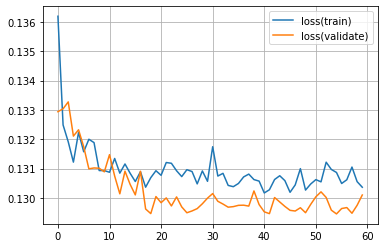

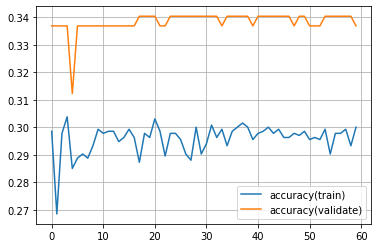

In [ ]:
for i in range(nr):
  net_class_l3 = Net_for_classification3(n_1=512, n_2=64, n_3=64, num_classes=6)
  net_class_l3.to(set_device())
  trainer = My_trainer(fpath=fpath_6, net=net_class_l3, loss_func_name='cross_entropy_loss', batchsize=12, num_epoch=ne, path_history='/content/drive/MyDrive/Lab/GNN_B4/history', task='classification')
  history = trainer.do_train_and_validate()
  t_losses = history['train_loss_values']
  t_accus = history['train_accuracy_values']
  v_losses = history['valid_loss_values']
  v_accus = history['valid_accuracy_values']
  trainer.plot_graph(t_losses, v_losses, ne, 'loss(train)', 'loss(validate)', True, 'loss_graph')
  trainer.save_loss_log(t_losses, v_losses, i)
  trainer.plot_graph(t_accus, v_accus, ne, 'accuracy(train)', 'accuracy(validate)', save=True, graph_name='acc_graph')
  trainer.save_acc_log(t_accus, v_accus, i)

Start training
epoch:  1
train_loss: 0.139932, train_accuracy: 23.1058%, valid_loss: 0.129662, valid_accuracy: 36.1404%
epoch:  2
train_loss: 0.134133, train_accuracy: 27.7569%, valid_loss: 0.130038, valid_accuracy: 36.1404%
epoch:  3
train_loss: 0.133978, train_accuracy: 28.5071%, valid_loss: 0.130269, valid_accuracy: 36.1404%
epoch:  4
train_loss: 0.133143, train_accuracy: 28.2071%, valid_loss: 0.129931, valid_accuracy: 36.1404%
epoch:  5
train_loss: 0.132146, train_accuracy: 28.2071%, valid_loss: 0.129702, valid_accuracy: 36.1404%
epoch:  6
train_loss: 0.132020, train_accuracy: 27.6819%, valid_loss: 0.129542, valid_accuracy: 36.1404%
epoch:  7
train_loss: 0.132867, train_accuracy: 28.8822%, valid_loss: 0.128981, valid_accuracy: 36.1404%
epoch:  8
train_loss: 0.132054, train_accuracy: 29.1073%, valid_loss: 0.129660, valid_accuracy: 36.1404%
epoch:  9
train_loss: 0.131901, train_accuracy: 28.9572%, valid_loss: 0.128928, valid_accuracy: 36.1404%
epoch: 10
train_loss: 0.131362, train_ac

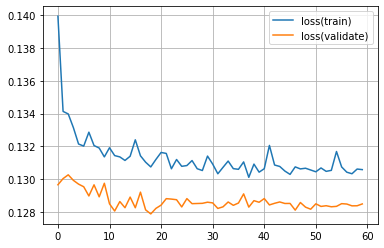

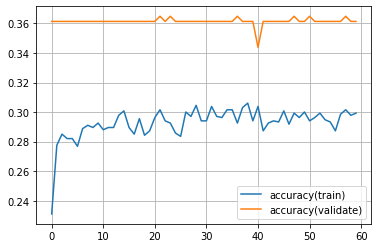

Start training
epoch:  1
train_loss: 0.135823, train_accuracy: 30.1575%, valid_loss: 0.132234, valid_accuracy: 28.4211%
epoch:  2
train_loss: 0.132595, train_accuracy: 28.4321%, valid_loss: 0.130118, valid_accuracy: 28.4211%
epoch:  3
train_loss: 0.133437, train_accuracy: 30.2326%, valid_loss: 0.130701, valid_accuracy: 28.4211%
epoch:  4
train_loss: 0.132981, train_accuracy: 31.0578%, valid_loss: 0.131404, valid_accuracy: 28.4211%
epoch:  5
train_loss: 0.131970, train_accuracy: 29.4074%, valid_loss: 0.130709, valid_accuracy: 28.4211%
epoch:  6
train_loss: 0.132593, train_accuracy: 30.0825%, valid_loss: 0.129634, valid_accuracy: 28.4211%
epoch:  7
train_loss: 0.131643, train_accuracy: 29.1823%, valid_loss: 0.129902, valid_accuracy: 28.4211%
epoch:  8
train_loss: 0.131207, train_accuracy: 28.2821%, valid_loss: 0.129697, valid_accuracy: 28.4211%
epoch:  9
train_loss: 0.130982, train_accuracy: 30.4576%, valid_loss: 0.130112, valid_accuracy: 28.4211%
epoch: 10
train_loss: 0.131309, train_ac

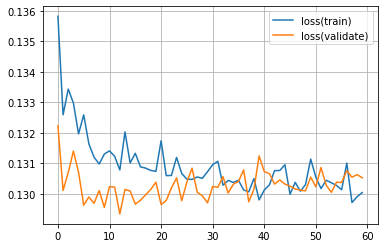

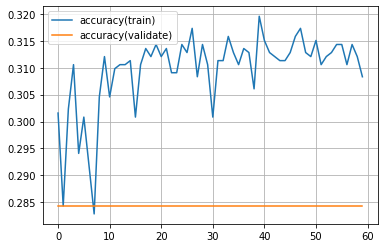

Start training
epoch:  1
train_loss: 0.138626, train_accuracy: 25.4314%, valid_loss: 0.131866, valid_accuracy: 31.5789%
epoch:  2
train_loss: 0.133588, train_accuracy: 29.7074%, valid_loss: 0.130995, valid_accuracy: 31.5789%
epoch:  3
train_loss: 0.133665, train_accuracy: 30.6827%, valid_loss: 0.130417, valid_accuracy: 31.5789%
epoch:  4
train_loss: 0.133095, train_accuracy: 29.4824%, valid_loss: 0.130291, valid_accuracy: 31.5789%
epoch:  5
train_loss: 0.132759, train_accuracy: 28.6572%, valid_loss: 0.131041, valid_accuracy: 31.5789%
epoch:  6
train_loss: 0.132663, train_accuracy: 30.0825%, valid_loss: 0.129806, valid_accuracy: 31.5789%
epoch:  7
train_loss: 0.131342, train_accuracy: 29.9325%, valid_loss: 0.128722, valid_accuracy: 31.5789%
epoch:  8
train_loss: 0.132148, train_accuracy: 29.6324%, valid_loss: 0.129554, valid_accuracy: 31.5789%
epoch:  9
train_loss: 0.132268, train_accuracy: 29.0323%, valid_loss: 0.129218, valid_accuracy: 31.5789%
epoch: 10
train_loss: 0.132312, train_ac

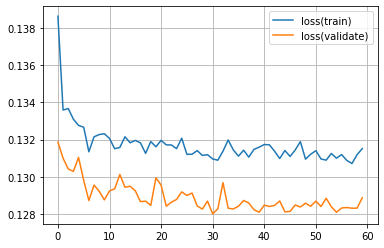

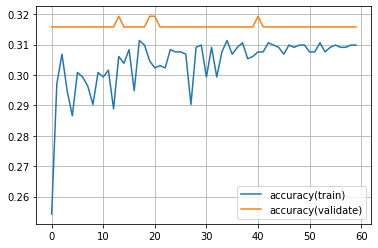

In [ ]:
for i in range(nr):
  net_class_l4 = Net_for_classification4(n_1=512, n_2=64, n_3=64, n_4=16, num_classes=6)
  net_class_l4.to(set_device())
  trainer = My_trainer(fpath=fpath_6, net=net_class_l4, loss_func_name='cross_entropy_loss', batchsize=12, num_epoch=ne, path_history='/content/drive/MyDrive/Lab/GNN_B4/history', task='classification')
  history = trainer.do_train_and_validate()
  t_losses = history['train_loss_values']
  t_accus = history['train_accuracy_values']
  v_losses = history['valid_loss_values']
  v_accus = history['valid_accuracy_values']
  trainer.plot_graph(t_losses, v_losses, ne, 'loss(train)', 'loss(validate)', True, 'loss_graph')
  trainer.save_loss_log(t_losses, v_losses, i)
  trainer.plot_graph(t_accus, v_accus, ne, 'accuracy(train)', 'accuracy(validate)', save=True, graph_name='acc_graph')
  trainer.save_acc_log(t_accus, v_accus, i)

Start training
epoch:  1
train_loss: 0.136359, train_accuracy: 26.9317%, valid_loss: 0.133462, valid_accuracy: 33.3333%
epoch:  2
train_loss: 0.134027, train_accuracy: 29.3323%, valid_loss: 0.133523, valid_accuracy: 33.3333%
epoch:  3
train_loss: 0.132134, train_accuracy: 30.3076%, valid_loss: 0.133016, valid_accuracy: 33.3333%
epoch:  4
train_loss: 0.131708, train_accuracy: 30.4576%, valid_loss: 0.132645, valid_accuracy: 33.3333%
epoch:  5
train_loss: 0.131997, train_accuracy: 32.1080%, valid_loss: 0.132961, valid_accuracy: 33.3333%
epoch:  6
train_loss: 0.131402, train_accuracy: 31.0578%, valid_loss: 0.131832, valid_accuracy: 33.3333%
epoch:  7
train_loss: 0.131079, train_accuracy: 31.5079%, valid_loss: 0.131507, valid_accuracy: 33.3333%
epoch:  8
train_loss: 0.131372, train_accuracy: 31.8080%, valid_loss: 0.131113, valid_accuracy: 33.3333%
epoch:  9
train_loss: 0.131221, train_accuracy: 32.3331%, valid_loss: 0.131842, valid_accuracy: 33.3333%
epoch: 10
train_loss: 0.130895, train_ac

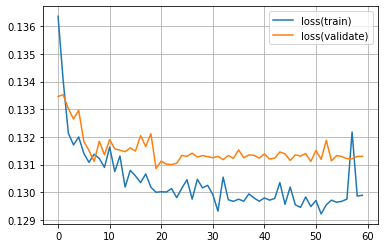

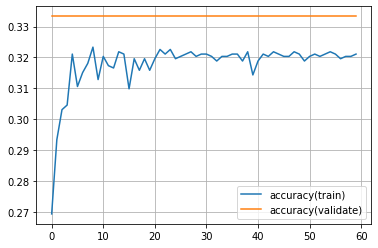

Start training
epoch:  1
train_loss: 0.141129, train_accuracy: 27.9820%, valid_loss: 0.137456, valid_accuracy: 24.9123%
epoch:  2
train_loss: 0.133671, train_accuracy: 30.6077%, valid_loss: 0.135642, valid_accuracy: 24.9123%
epoch:  3
train_loss: 0.132589, train_accuracy: 30.0075%, valid_loss: 0.135477, valid_accuracy: 24.9123%
epoch:  4
train_loss: 0.131987, train_accuracy: 29.2573%, valid_loss: 0.136938, valid_accuracy: 24.9123%
epoch:  5
train_loss: 0.131695, train_accuracy: 30.8327%, valid_loss: 0.136049, valid_accuracy: 24.9123%
epoch:  6
train_loss: 0.131940, train_accuracy: 31.1328%, valid_loss: 0.135905, valid_accuracy: 24.9123%
epoch:  7
train_loss: 0.131181, train_accuracy: 31.2828%, valid_loss: 0.135437, valid_accuracy: 24.9123%
epoch:  8
train_loss: 0.130387, train_accuracy: 33.0083%, valid_loss: 0.135405, valid_accuracy: 24.9123%
epoch:  9
train_loss: 0.130198, train_accuracy: 32.4081%, valid_loss: 0.134954, valid_accuracy: 24.9123%
epoch: 10
train_loss: 0.129958, train_ac

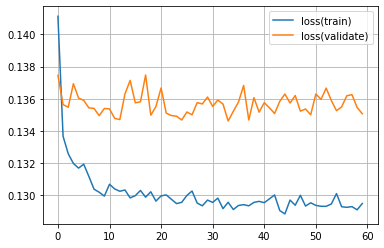

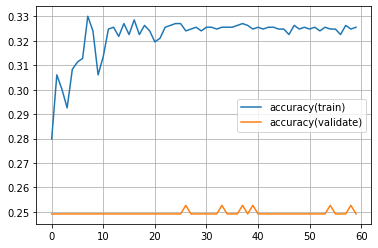

Start training
epoch:  1
train_loss: 0.137382, train_accuracy: 26.3316%, valid_loss: 0.138832, valid_accuracy: 27.7193%
epoch:  2
train_loss: 0.132644, train_accuracy: 29.8575%, valid_loss: 0.138997, valid_accuracy: 27.7193%
epoch:  3
train_loss: 0.131994, train_accuracy: 29.3323%, valid_loss: 0.138606, valid_accuracy: 27.7193%
epoch:  4
train_loss: 0.132632, train_accuracy: 30.0825%, valid_loss: 0.137436, valid_accuracy: 27.7193%
epoch:  5
train_loss: 0.131332, train_accuracy: 30.4576%, valid_loss: 0.138801, valid_accuracy: 27.7193%
epoch:  6
train_loss: 0.131060, train_accuracy: 29.8575%, valid_loss: 0.136901, valid_accuracy: 27.7193%
epoch:  7
train_loss: 0.131491, train_accuracy: 30.9077%, valid_loss: 0.136235, valid_accuracy: 27.7193%
epoch:  8
train_loss: 0.131076, train_accuracy: 31.2078%, valid_loss: 0.137558, valid_accuracy: 27.7193%
epoch:  9
train_loss: 0.130589, train_accuracy: 31.0578%, valid_loss: 0.138269, valid_accuracy: 27.7193%
epoch: 10
train_loss: 0.130352, train_ac

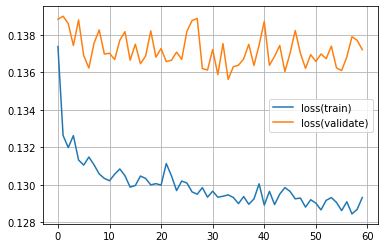

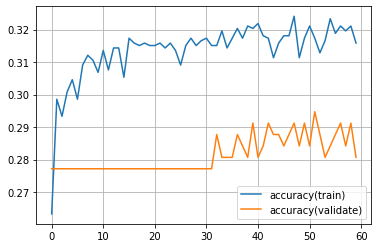

In [ ]:
for i in range(nr):
  net_class_l5 = Net_for_classification5(n_1=512, n_2=64, n_3=64, n_4=64, n_5=16, num_classes=6)
  net_class_l5.to(set_device())
  trainer = My_trainer(fpath=fpath_6, net=net_class_l5, loss_func_name='cross_entropy_loss', batchsize=12, num_epoch=ne, path_history='/content/drive/MyDrive/Lab/GNN_B4/history', task='classification')
  history = trainer.do_train_and_validate()
  t_losses = history['train_loss_values']
  t_accus = history['train_accuracy_values']
  v_losses = history['valid_loss_values']
  v_accus = history['valid_accuracy_values']
  trainer.plot_graph(t_losses, v_losses, ne, 'loss(train)', 'loss(validate)', True, 'loss_graph')
  trainer.save_loss_log(t_losses, v_losses, i)
  trainer.plot_graph(t_accus, v_accus, ne, 'accuracy(train)', 'accuracy(validate)', save=True, graph_name='acc_graph')
  trainer.save_acc_log(t_accus, v_accus, i)

Start training
epoch:  1
train_loss: 0.137633, train_accuracy: 27.4569%, valid_loss: 0.130040, valid_accuracy: 33.6842%
epoch:  2
train_loss: 0.134109, train_accuracy: 30.6077%, valid_loss: 0.129893, valid_accuracy: 33.6842%
epoch:  3
train_loss: 0.132522, train_accuracy: 30.6077%, valid_loss: 0.129546, valid_accuracy: 33.6842%
epoch:  4
train_loss: 0.132625, train_accuracy: 30.0075%, valid_loss: 0.129482, valid_accuracy: 33.6842%
epoch:  5
train_loss: 0.132670, train_accuracy: 30.2326%, valid_loss: 0.128421, valid_accuracy: 33.6842%
epoch:  6
train_loss: 0.131709, train_accuracy: 31.8080%, valid_loss: 0.130508, valid_accuracy: 33.6842%
epoch:  7
train_loss: 0.131347, train_accuracy: 32.1080%, valid_loss: 0.129473, valid_accuracy: 33.6842%
epoch:  8
train_loss: 0.131558, train_accuracy: 31.7329%, valid_loss: 0.127798, valid_accuracy: 33.6842%
epoch:  9
train_loss: 0.131951, train_accuracy: 31.3578%, valid_loss: 0.129040, valid_accuracy: 33.6842%
epoch: 10
train_loss: 0.131752, train_ac

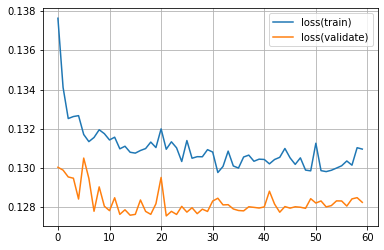

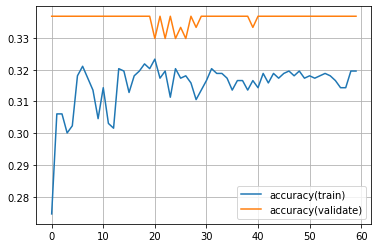

Start training
epoch:  1
train_loss: 0.137073, train_accuracy: 26.1815%, valid_loss: 0.131701, valid_accuracy: 34.0351%
epoch:  2
train_loss: 0.134076, train_accuracy: 27.1568%, valid_loss: 0.131585, valid_accuracy: 34.0351%
epoch:  3
train_loss: 0.132797, train_accuracy: 28.0570%, valid_loss: 0.130312, valid_accuracy: 34.0351%
epoch:  4
train_loss: 0.132291, train_accuracy: 29.2573%, valid_loss: 0.130691, valid_accuracy: 34.0351%
epoch:  5
train_loss: 0.131571, train_accuracy: 28.8822%, valid_loss: 0.131522, valid_accuracy: 34.0351%
epoch:  6
train_loss: 0.131700, train_accuracy: 29.1823%, valid_loss: 0.131478, valid_accuracy: 34.0351%
epoch:  7
train_loss: 0.132234, train_accuracy: 28.9572%, valid_loss: 0.130953, valid_accuracy: 34.0351%
epoch:  8
train_loss: 0.131809, train_accuracy: 30.4576%, valid_loss: 0.131297, valid_accuracy: 34.0351%
epoch:  9
train_loss: 0.131461, train_accuracy: 29.4074%, valid_loss: 0.131716, valid_accuracy: 34.0351%
epoch: 10
train_loss: 0.131266, train_ac

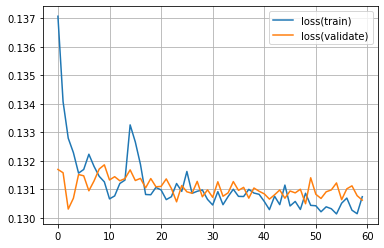

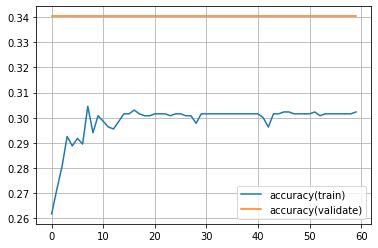

Start training
epoch:  1
train_loss: 0.141806, train_accuracy: 26.8567%, valid_loss: 0.132439, valid_accuracy: 30.1754%
epoch:  2
train_loss: 0.134841, train_accuracy: 28.9572%, valid_loss: 0.131324, valid_accuracy: 30.1754%
epoch:  3
train_loss: 0.134388, train_accuracy: 29.9325%, valid_loss: 0.130305, valid_accuracy: 30.1754%
epoch:  4
train_loss: 0.133069, train_accuracy: 30.6077%, valid_loss: 0.129857, valid_accuracy: 30.1754%
epoch:  5
train_loss: 0.132851, train_accuracy: 29.7074%, valid_loss: 0.130184, valid_accuracy: 30.1754%
epoch:  6
train_loss: 0.133083, train_accuracy: 30.1575%, valid_loss: 0.130215, valid_accuracy: 30.1754%
epoch:  7
train_loss: 0.131630, train_accuracy: 30.9077%, valid_loss: 0.130498, valid_accuracy: 30.5263%
epoch:  8
train_loss: 0.132025, train_accuracy: 30.6827%, valid_loss: 0.130437, valid_accuracy: 27.0175%
epoch:  9
train_loss: 0.131511, train_accuracy: 29.9325%, valid_loss: 0.129366, valid_accuracy: 30.5263%
epoch: 10
train_loss: 0.131518, train_ac

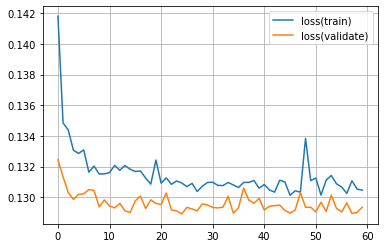

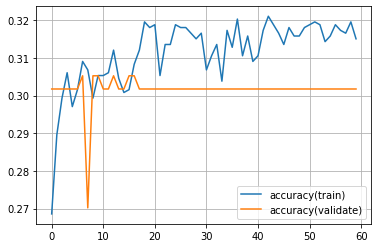

In [ ]:
for i in range(nr):
  net_class_l6 = Net_for_classification6(n_1=512, n_2=64, n_3=64, n_4=64, n_5=16, n_6=16, num_classes=6)
  net_class_l6.to(set_device())
  trainer = My_trainer(fpath=fpath_6, net=net_class_l6, loss_func_name='cross_entropy_loss', batchsize=12, num_epoch=ne, path_history='/content/drive/MyDrive/Lab/GNN_B4/history', task='classification')
  history = trainer.do_train_and_validate()
  t_losses = history['train_loss_values']
  t_accus = history['train_accuracy_values']
  v_losses = history['valid_loss_values']
  v_accus = history['valid_accuracy_values']
  trainer.plot_graph(t_losses, v_losses, ne, 'loss(train)', 'loss(validate)', True, 'loss_graph')
  trainer.save_loss_log(t_losses, v_losses, i)
  trainer.plot_graph(t_accus, v_accus, ne, 'accuracy(train)', 'accuracy(validate)', save=True, graph_name='acc_graph')
  trainer.save_acc_log(t_accus, v_accus, i)

In [ ]:
nee = 200
ii = 1

In [ ]:
net_class_l3 = Net_for_classification3(n_1=512, n_2=64, n_3=64, num_classes=6)
net_class_l3.to(set_device())
net_class_l32 = Net_for_classification3(n_1=512, n_2=64, n_3=64, num_classes=6)
net_class_l32.to(set_device())
trainer = My_trainer(fpath=fpath_6, net=net_class_l3, loss_func_name='cross_entropy_loss', batchsize=12, num_epoch=nee, path_history='/content/drive/MyDrive/Lab/GNN_B4/history', task='classification')
history = trainer.do_train_for_test(net_class_l32)
t_losses = history['train_loss_values']
t_accus = history['train_accuracy_values']
v_losses = history['test_loss_values']
v_accus = history['test_accuracy_values']
# trainer.plot_graph(t_losses, v_losses, nee, 'loss(train)', 'loss(test)', True, 'loss_graph')
trainer.save_loss_log(t_losses, v_losses, ii)
# trainer.plot_graph(t_accus, v_accus, nee, 'accuracy(train)', 'accuracy(test)', save=True, graph_name='acc_graph')
trainer.save_acc_log(t_accus, v_accus, ii)

Start training
epoch:  1
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,